<a href="https://colab.research.google.com/github/THANHDAT202/CNN/blob/main/CNN_people.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.utils import to_categorical


In [8]:
# Khai báo đường dẫn tới thư mục chứa dữ liệu
data_dir = '/content/drive/MyDrive/BT1/nguoi_noi_tieng'


In [9]:
# Tạo các tập train, validation và test bằng cách sử dụng ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Chia dữ liệu thành tập train và validation
test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Lấy tập train từ tập chia theo validation_split
valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Lấy tập validation từ tập chia theo validation_split
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False) # Không shuffle tập test
  

Found 120 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [11]:
train_generator.class_indices


{'Bill_Gates': 0, 'Elon_Musk': 1, 'Messi': 2, 'Ronaldo': 3, 'Steve_Jobs': 4}

In [14]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(224,224,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [15]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình với các tập train và validation được chia trên
train=model.fit(train_generator,batch_size=128,epochs=50,verbose=1,validation_data=valid_generator)

Epoch 1/50
4/4 [==============================] - 91s 23s/step - loss: 24.2430 - accuracy: 0.2083 - val_loss: 1.6303 - val_accuracy: 0.2000
Epoch 2/50
4/4 [==============================] - 73s 20s/step - loss: 1.6256 - accuracy: 0.1667 - val_loss: 1.6073 - val_accuracy: 0.2000
Epoch 3/50
4/4 [==============================] - 76s 19s/step - loss: 1.6080 - accuracy: 0.1917 - val_loss: 1.5968 - val_accuracy: 0.2000
Epoch 4/50
4/4 [==============================] - 75s 19s/step - loss: 1.5872 - accuracy: 0.2583 - val_loss: 1.5652 - val_accuracy: 0.1667
Epoch 5/50
4/4 [==============================] - 73s 17s/step - loss: 1.6088 - accuracy: 0.3333 - val_loss: 1.5590 - val_accuracy: 0.2333
Epoch 6/50
4/4 [==============================] - 72s 19s/step - loss: 1.5240 - accuracy: 0.3583 - val_loss: 1.5126 - val_accuracy: 0.4000
Epoch 7/50
4/4 [==============================] - 77s 19s/step - loss: 1.4755 - accuracy: 0.4167 - val_loss: 1.3997 - val_accuracy: 0.3333
Epoch 8/50
4/4 [==========

In [16]:
test_loss,test_acc = model.evaluate(train_generator)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)


4/4 [==============================] - 19s 4s/step - loss: 0.2538 - accuracy: 0.9167
độ chính xác trên tập kiểm tra 0.9166666865348816
hàm mất mát trên tập kiểm ta 0.2538152039051056


In [17]:
#lưu
from keras.models import load_model
model.save("people(CNN).h5")
model_1=load_model('people(CNN).h5')

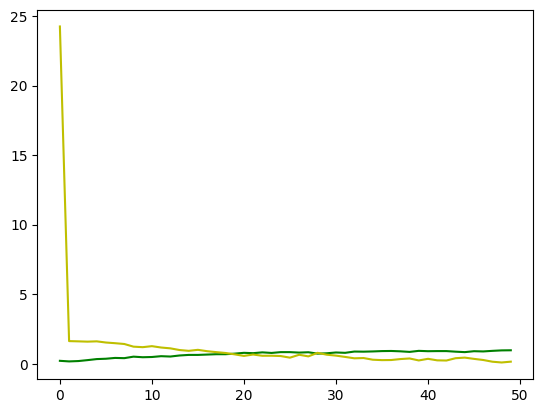

In [18]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()


Saving p1.jpg to p1 (1).jpg
1/1 [==============================] - 0s 292ms/step
[[0. 1. 0. 0. 0.]]
Giá trị dự đoán:  Elon_Musk


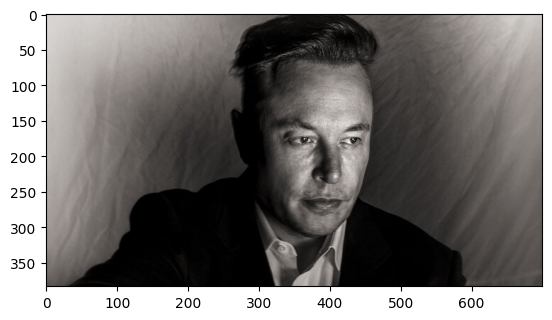

In [20]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=load_img(path,target_size=(224,224))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  label=['Bill_Gates', 'Elon_Musk', 'Messi', 'Ronaldo', 'Steve_Jobs']
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])